In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as st
import plotly.express as px
import pyreadr

In [116]:
#Q1
df=pd.read_csv(r'C:\Users\Chenyi\Desktop\LR\hw1\SENIC.txt',delim_whitespace = True)
df

,ID,Stay,Age,Risk,Cult,Xray,Beds,MS,Reg,Cen,Nurses,AFS
0,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,11.80,53.8,5.7,9.1,116.9,571,1,2,441,469,62.9
109,110,9.50,49.3,5.8,42.0,70.9,98,2,3,68,46,22.9
110,111,7.70,56.9,4.4,12.2,67.9,129,2,4,85,136,62.9
111,112,17.94,56.2,5.9,26.4,91.8,835,1,1,791,407,62.9


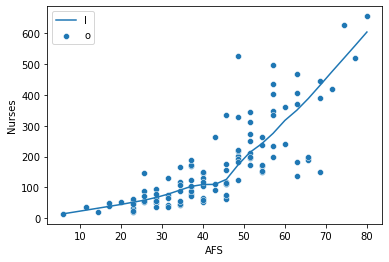

In [117]:
#Q1(a)
sns.scatterplot(x='AFS', y='Nurses',data=df)

lowess = sm.nonparametric.lowess
y=df['Nurses'].values
x=df['AFS'].values
y_smooth = lowess(y, x, frac=1/3)[:,1]#The second column of the return is the smoothed data
plt.plot(np.sort(x),y_smooth)
plt.legend('lowess smoother')
    
plt.show()

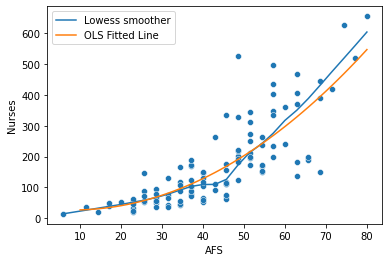

In [118]:
#Q1(b)
X = np.column_stack((x, x ** 2))
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
parameters=model.params

sns.scatterplot(x='AFS', y='Nurses',data=df)
lowess = sm.nonparametric.lowess
y=df['Nurses'].values
x=df['AFS'].values
y_smooth = lowess(y, x, frac=1/3)[:,1]#The second column of the return is the smoothed data
p1,=plt.plot(np.sort(x),y_smooth)
#plot the fitted line
x_plot=np.linspace(10,80)
y_plot=model.params[0]+x_plot*model.params[1]+x_plot**2*model.params[2]
plt.plot(x_plot,y_plot) 
plt.legend(["Lowess smoother", "OLS Fitted Line"])
plt.show()


In [119]:
#Q1(c)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     105.3
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           2.79e-26
Time:                        22:48:12   Log-Likelihood:                -657.20
No. Observations:                 113   AIC:                             1320.
Df Residuals:                     110   BIC:                             1329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5482     51.414      0.653      0.5

In [120]:
#Q1(d)
point1=model.get_prediction([1,30,30**2])
point2=model.get_prediction([1,60,60**2])
print(point1.summary_frame())
print(point2.summary_frame())

        mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  74.611556  10.322102      54.155572       95.06754    -89.780914   

   obs_ci_upper  
0    239.004025  
         mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  297.769429  11.625446     274.730523     320.808334    133.035619   

   obs_ci_upper  
0    462.503238  


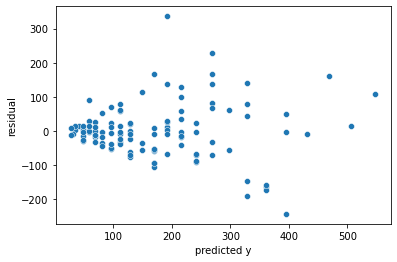

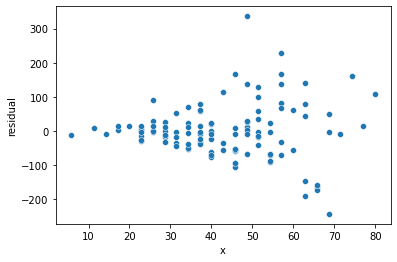

Text(0.5, 1.0, 'normalprobability plot of residuals')

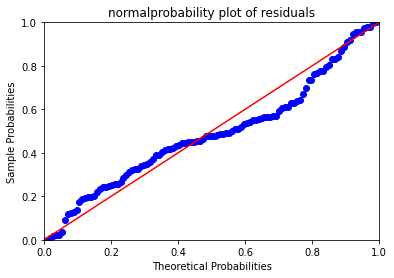

In [121]:
#Q1(e)
#(i) versus y_hat
y_hat=model.predict()
res=model.resid
sns.scatterplot(x=y_hat,y=res)
plt.xlabel('predicted y')
plt.ylabel('residual')
plt.show()
#(ii)versus_x
sns.scatterplot(x=x,y=res)
plt.xlabel('x')
plt.ylabel('residual')
plt.show()
#(iii) pp-plot
pplot = sm.ProbPlot(res, dist = st.norm, fit=True)
pplot.ppplot(line="45")
plt.title("normalprobability plot of residuals")
#


In [122]:
#Q2
#2(a)
matrix = df[['Stay','Age','Cult','Cen','AFS']]
fig = px.scatter_matrix(matrix)
fig.show()

In [123]:
#2(b)
y=df['Stay'].values
X_continuous = df[['Age','Cult','Cen','AFS']].values
midwest=df['Reg'].apply(lambda x: 1 if x==2 else 0).values
south=df['Reg'].apply(lambda x: 1 if x==3 else 0).values
west=df['Reg'].apply(lambda x: 1 if x==4 else 0).values
X = np.column_stack((X_continuous,midwest,south,west ))
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     14.89
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           2.28e-13
Time:                        22:48:12   Log-Likelihood:                -194.09
No. Observations:                 113   AIC:                             404.2
Df Residuals:                     105   BIC:                             426.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1978      1.878      2.235      0.028       0.474       7.922
x1             0.1037      0.031      3.296      0.001       0.041       0.166
x2             0.0403      0.014      2.818      0.006       0.012       0.069
x3             0.0066      0.001      4.700      0.000       0.004       0.009
x4            -0.0208      0.014     -1.445      0.151      -0.049       0.008
x5            -0.9597      0.382     -2.514      0.013      -1.717      -0.203
x6            -1.5165      0.380     -3.990      0.000      -2.270      -0.763
x7            -2.1500      0.462     -4.659      0.000      -3.065      -1.235
==============================================================================
Omnibus:                       62.195   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.292
Skew:                           1.713   Prob(JB):                     2.63e-83
Kurtosis:                      11.309   Cond. No.                     3.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
#2(c)
print(0.0403-0.014*st.t.ppf(0.995,105))
print(0.0403+0.014*st.t.ppf(0.995,105))

0.0035714830667660513
0.07702851693323395


In [125]:
#2(d)
X2=sm.add_constant(X_continuous)
model2=sm.OLS(y, X2).fit()
anova_lm(model2, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,108.0,255.741754,0.0,NaN,NaN,NaN
1,105.0,205.363391,3.0,50.378363,8.585964,0.000038


In [126]:
#Q3
data = pyreadr.read_r(r'C:\Users\Chenyi\Desktop\LR\hw3\teengamb.rda')
df = pd.concat(data, ignore_index = True) 
x=df[['sex','status','income','verbal']].values
y=df['gamble'].values
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
# model.summary()

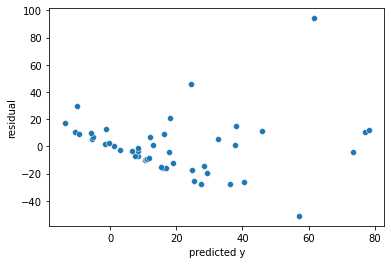

In [127]:
#pre-diagnose
#residuals versus y_hat
y_hat=model.predict()
res=model.resid
sns.scatterplot(x=y_hat,y=res)
plt.xlabel('predicted y')
plt.ylabel('residual')
plt.show()

In [128]:
#Transform y to get a new model
import math
y=df['gamble'].apply(math.sqrt).values
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     13.61
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           3.36e-07
Time:                        22:48:13   Log-Likelihood:                -98.559
No. Observations:                  47   AIC:                             207.1
Df Residuals:                      42   BIC:                             216.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9771      1.579      1.885      0.066      -0.210       6.165
x1            -2.0445      0.754     -2.711      0.010      -3.566      -0.523
x2             0.0369      0.026      1.428      0.161      -0.015       0.089
x3             0.4794      0.094      5.090      0.000       0.289       0.669
x4            -0.4236      0.200     -2.123      0.040      -0.826      -0.021
==============================================================================
Omnibus:                        2.275   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.333
Skew:                           0.326   Prob(JB):                        0.513
Kurtosis:                       3.506   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

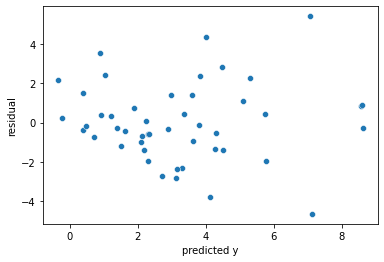

In [129]:
#3(a)
#versus y_hat
y_hat=model.predict()
res=model.resid
sns.scatterplot(x=y_hat,y=res)
plt.xlabel('predicted y')
plt.ylabel('residual')
plt.show()

Text(0.5, 1.0, 'qq-plot of residuals')

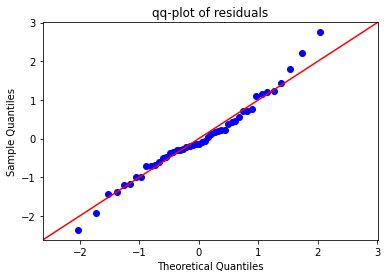

In [130]:
#3(b)
pplot = sm.ProbPlot(res, dist = st.norm, fit=True)
pplot.qqplot(line="45")
plt.title("qq-plot of residuals")

Rule of thumb threshold:
0.2553191489361702


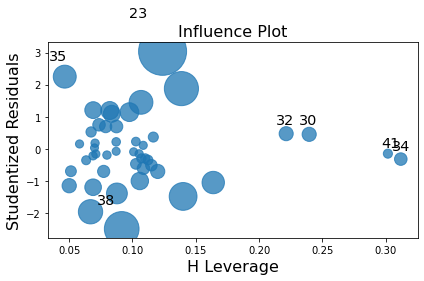

In [131]:
#3(ce)
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout()
print('Rule of thumb threshold:')
print(2*(5+1)/47)

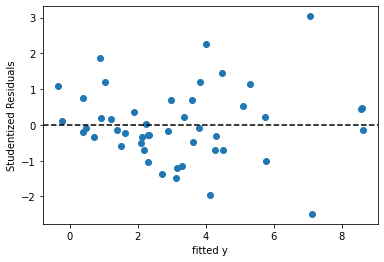

[[-0.18956871  0.8505825   1.        ]
 [ 0.11307761  0.91052089  1.        ]
 [-0.35044101  0.72780187  1.        ]
 [-0.46397233  0.64512167  1.        ]
 [ 1.87784086  0.06752846  1.        ]
 [-1.04420714  0.30250739  1.        ]
 [-0.21257332  0.83271314  1.        ]
 [-0.15690392  0.87609069  1.        ]
 [ 0.18117811  0.85712048  1.        ]
 [-0.60083195  0.55125924  1.        ]
 [-0.08835878  0.9300217   1.        ]
 [ 0.0343892   0.97273368  1.        ]
 [-0.15228399  0.87970989  1.        ]
 [ 0.75137958  0.45671574  1.        ]
 [ 0.15572566  0.87701347  1.        ]
 [ 1.09521097  0.27981636  1.        ]
 [-1.47647753  0.14745574  1.        ]
 [-0.69844596  0.48884125  1.        ]
 [ 1.20859171  0.23374413  1.        ]
 [-1.38297415  0.17415867  1.        ]
 [-1.14288024  0.25971828  1.        ]
 [-0.50602576  0.61554872  1.        ]
 [-1.95322065  0.05764117  1.        ]
 [ 3.03700499  0.00414277  0.19471018]
 [ 0.22964684  0.81950805  1.        ]
 [-0.34428425  0.73239219

In [132]:
#3(d)
stud_res = model.outlier_test()
# create scatterplot of predictor variable vs. studentized residuals
plt.scatter(model.predict(), stud_res[:,0])
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('fitted y')
plt.ylabel('Studentized Residuals') 
plt.show()
print(stud_res)

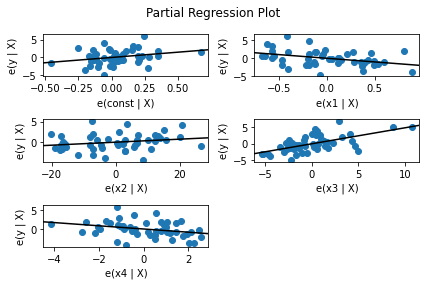

In [133]:
#3(f)
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

In [134]:
# #Q4
# data = pyreadr.read_r(r'C:\Users\Chenyi\Desktop\LR\hw3\cheddar.rda')
# df=pd.concat(data, ignore_index = True) 
# y=df['taste'].values
# x=df[['Acetic','H2S','Lactic']]

In [135]:
# #4(a)
# from pygam import LinearGAM
# model=LinearGAM().fit(x,y)
# ## plotting
# plt.figure();
# fig, axs = plt.subplots(1,3);

# titles = ['year', 'age', 'education']
# for i, ax in enumerate(axs):
#     XX = gam.generate_X_grid(term=i)
#     ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
#     ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
#     if i == 0:
#         ax.set_ylim(-30,30)
#     ax.set_title(titles[i]);